In [1]:
import scanpy as sc
import anndata
import pandas as pd
import os
import matplotlib.pyplot as plt
sc.set_figure_params(figsize=(8, 8), frameon=False)

In [2]:
homeDir = 'data'
tenX_meta_fn = os.path.join(homeDir,"snRNA-seq", "neurons","cn_neurons.meta.csv")
tenXdata_fn = os.path.join(homeDir, 'snRNA-seq', 'neurons', 'cn_neurons.h5ad')
patseq_meta_fn = os.path.join(homeDir,"Patchseq", "patchseq.dataset.final.meta.csv")
patseq_fn = os.path.join(homeDir,"Patchseq","patchseq.dataset.final.h5ad")

## 10x dataset neurons meta-information

In [3]:
tenX_metaDF = pd.read_csv(tenX_meta_fn, index_col=0)
print(f'Shape of 10x metainfo: {tenX_metaDF.shape}')
tenX_metaDF.head()

Shape of 10x metainfo: (31639, 16)


,n_genes_by_counts,total_counts,total_counts_Mitochondrial,pct_counts_Mitochondrial,n_genes,doublet_scores,predicted_doublets,doublet_info,gender,seqbatch,sample,preparations,clusters,subclusters,UMAP_embedding1,UMAP_embedding2
AAACCCATCTCGACCT-1,3279,7790.0,1.0,0.012837,3279,0.038462,False,False,female,seq5,p5s1,prep5,Golgi,Golgi,-3.772751,10.375655
AAACGAAAGCAACAGC-1,2421,4959.0,5.0,0.100827,2421,0.035052,False,False,female,seq5,p5s1,prep5,UBC,UBC,13.308725,10.824718
AAAGGATGTTTGAAAG-1,1757,3529.0,3.0,0.085010,1757,0.057471,False,False,female,seq5,p5s1,prep5,GC,GC,0.600971,-0.719731
AAAGGATTCGGCTTGG-1,1978,3872.0,3.0,0.077479,1978,0.081917,False,False,female,seq5,p5s1,prep5,GC,GC,8.600731,-1.052138
AAAGGGCCAATGTTGC-1,5977,19818.0,12.0,0.060551,5977,0.108257,False,False,female,seq5,p5s1,prep5,T-stellate,T-Fn1,3.101216,10.157592


## UMAP of 10x dataset

In [4]:
tenX_adata = anndata.read_h5ad(tenXdata_fn)
tenX_adata

AnnData object with n_obs × n_vars = 31639 × 18727
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'n_genes', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'gender', 'seqbatch', 'sample', 'preparations', 'clusters', 'subclusters'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'clusters_colors', 'hvg', 'subclusters_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

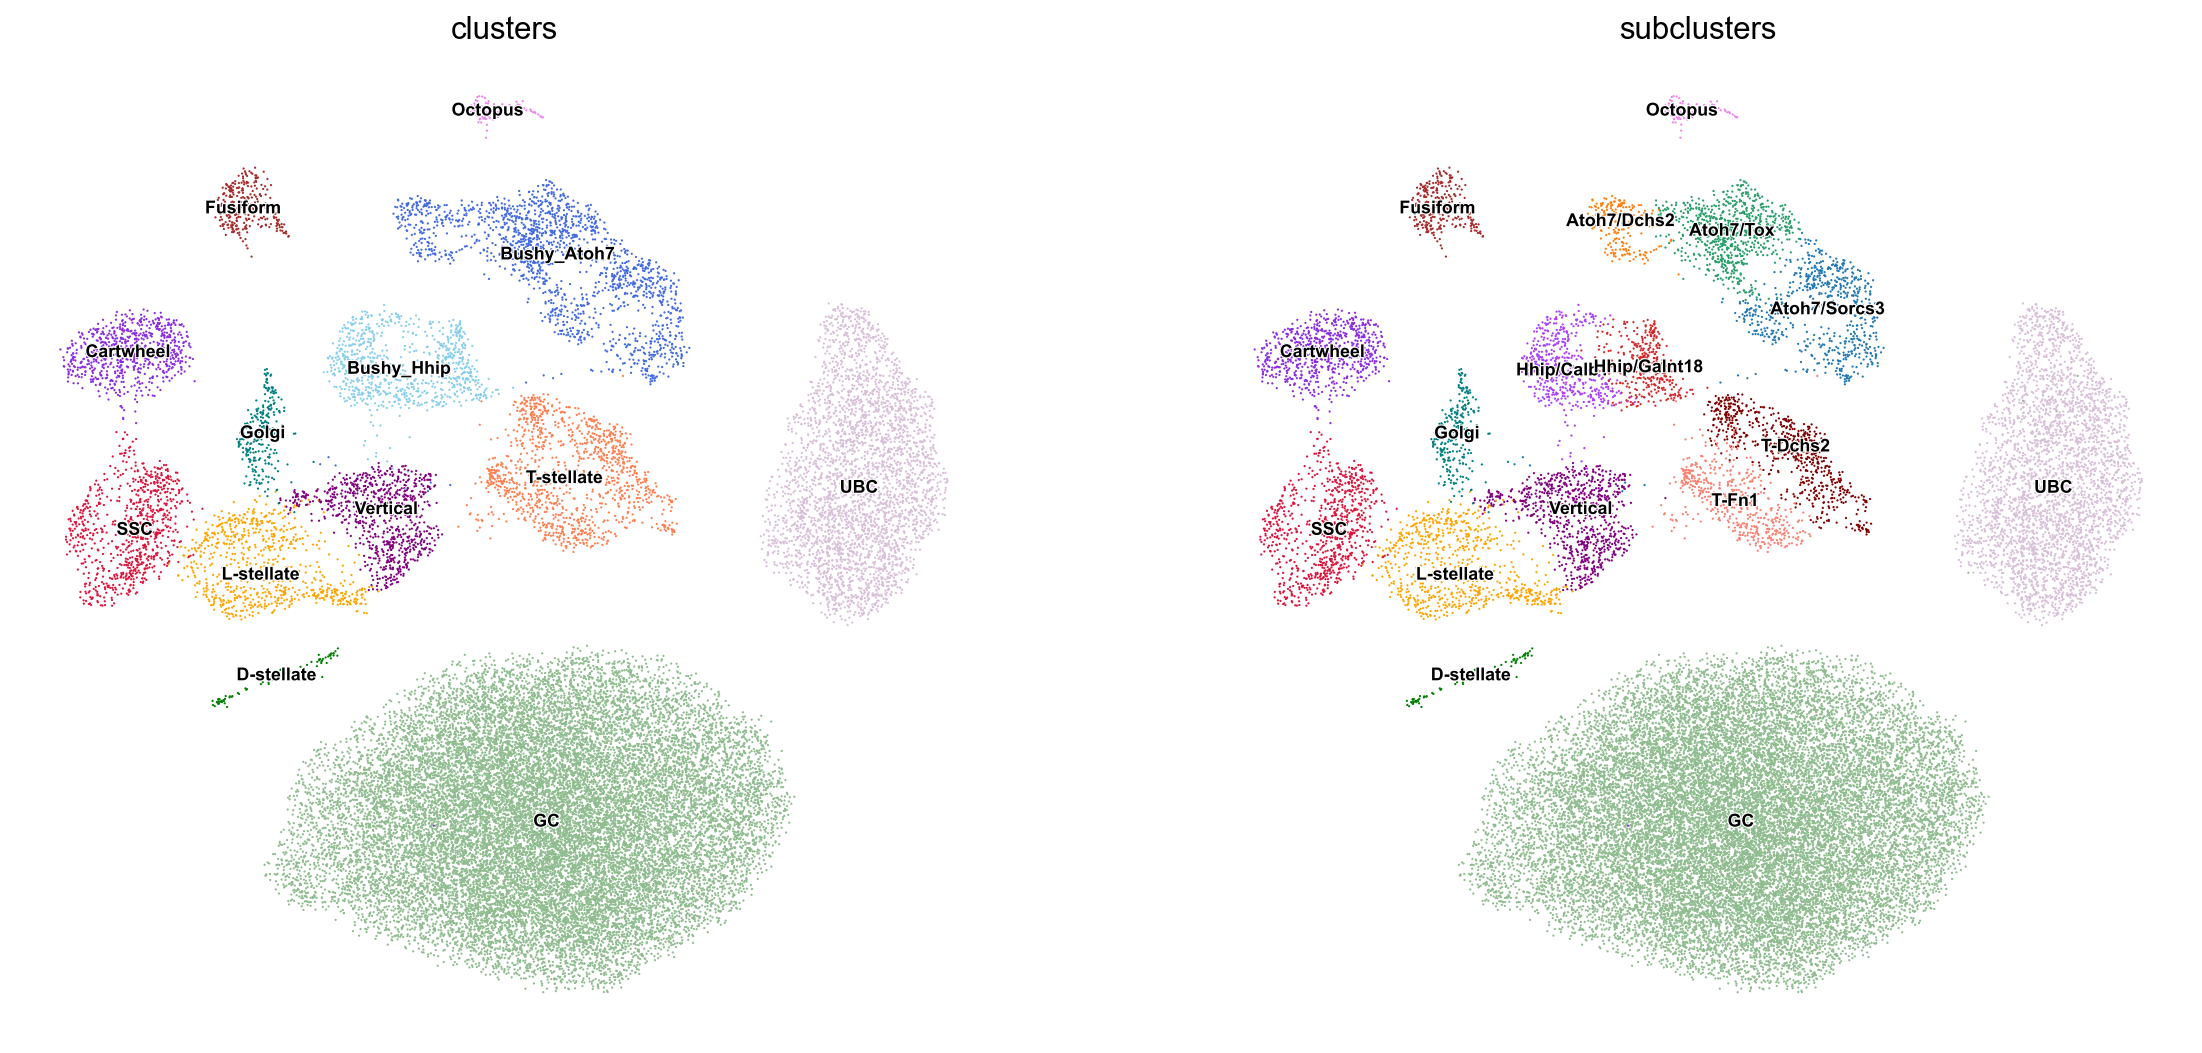

In [5]:
sc.pl.umap(tenX_adata, color=['clusters', 'subclusters'], 
           s = 4, legend_loc='on data', legend_fontsize=8, legend_fontoutline=1,
          frameon=False)

## Patchseq dataset mata-information

In [6]:
patseq_metaDF = pd.read_csv(patseq_meta_fn)
print(f'Shape of patchseq metainfo: {patseq_metaDF.shape}')
patseq_metaDF.head()

Shape of patchseq metainfo: (387, 63)


,Cell,n_genes_by_counts,total_counts,total_counts_ERCC,pct_counts_ERCC,T-cluster,T-cluster_umapX,T-cluster_umapY,Cell.1,Seq,...,epsc_decay_tau (ms),epsc_freq (Hz),epsc_amp (pA),ipsc_rise_time (ms),ipsc_half_width (ms),ipsc_decay_tau (ms),ipsc_freq (Hz),ipsc_amp (pA),UMAP1,UMAP2
0,S002,6694,2497425,48602,1.946084,Bushy_Hhip,1.477601,-4.530602,S002,YES,...,0.922710,2.31257,22.3259,2.1124,3.2961,2.880826,4.17994,9.12739,8.924294,9.047951
1,S003,6942,3474797,38152,1.097963,Bushy_Atoh7,3.818105,0.535229,S003,YES,...,1.513762,12.96070,37.1916,3.0713,3.2778,1.901465,6.68246,17.00590,14.006301,10.278277
2,S004,9517,4191776,9116,0.217473,Bushy_Atoh7,-0.292895,-0.164908,S004,YES,...,0.683482,3.99651,25.7089,1.7533,5.3250,4.527163,8.05813,14.79320,11.879890,11.802360
3,S005,7957,3780176,25237,0.667614,Bushy_Atoh7,0.214136,0.438229,S005,YES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.366405,12.206918
4,S015,9593,3526404,15172,0.430240,Bushy_Hhip,-0.419328,-4.989791,S015,YES,...,0.754277,5.74909,28.8461,1.6456,3.7680,3.322381,1.60414,18.73430,6.030383,10.919445


# UMAP of patchseq data

In [7]:
patchseq_adata = anndata.read_h5ad(patseq_fn)
patchseq_adata

AnnData object with n_obs × n_vars = 387 × 32232
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'T-cluster', 'T-cluster_umapX', 'T-cluster_umapY', 'Cell', 'Seq', 'Expert_label', 'recording', 'Glyt2_eGFP', 'Sst_tdTomato', 'Penk_tdTomato', '>10 gene number', '>0 gene number', 'Seq_Depth', 'STAR_mapping_rate', 'Batch', '3d_loc_x', '3d_loc_y', '3d_loc_z', '3d_loc', '10x_mapping_umapX', '10x_mapping_umapY', 'annoated_10x_clusters', '10x_clusters_subclusters', 'Tau (ms)', 'SagRatio', 'Rebound (mV)', 'RM (Mohm)', 'RMP (mV)', 'RheoBase (pA)', 'Spike Delay (ms)', 'Threshold (mV)', 'Amplitude (mV)', 'AHP (mV)', 'Depolarization Time (ms)', 'Repolarization Time (ms)', 'Half Width (ms)', 'Max Spike Number', 'AP Number @ 2xRheabase', 'Initial Adaptation', 'Last Adaptation', 'AP2_Diff', 'AP3_Diff', 'AP_End_Diff', 'Rebound_abs (mV)', 'Rebound_spikes', 'Spike_Delay @ 2xRheobase', 'epsc_rise_time (ms)', 'epsc_half_width (ms)', 'epsc_decay_tau (ms)', 'epsc_freq (Hz)

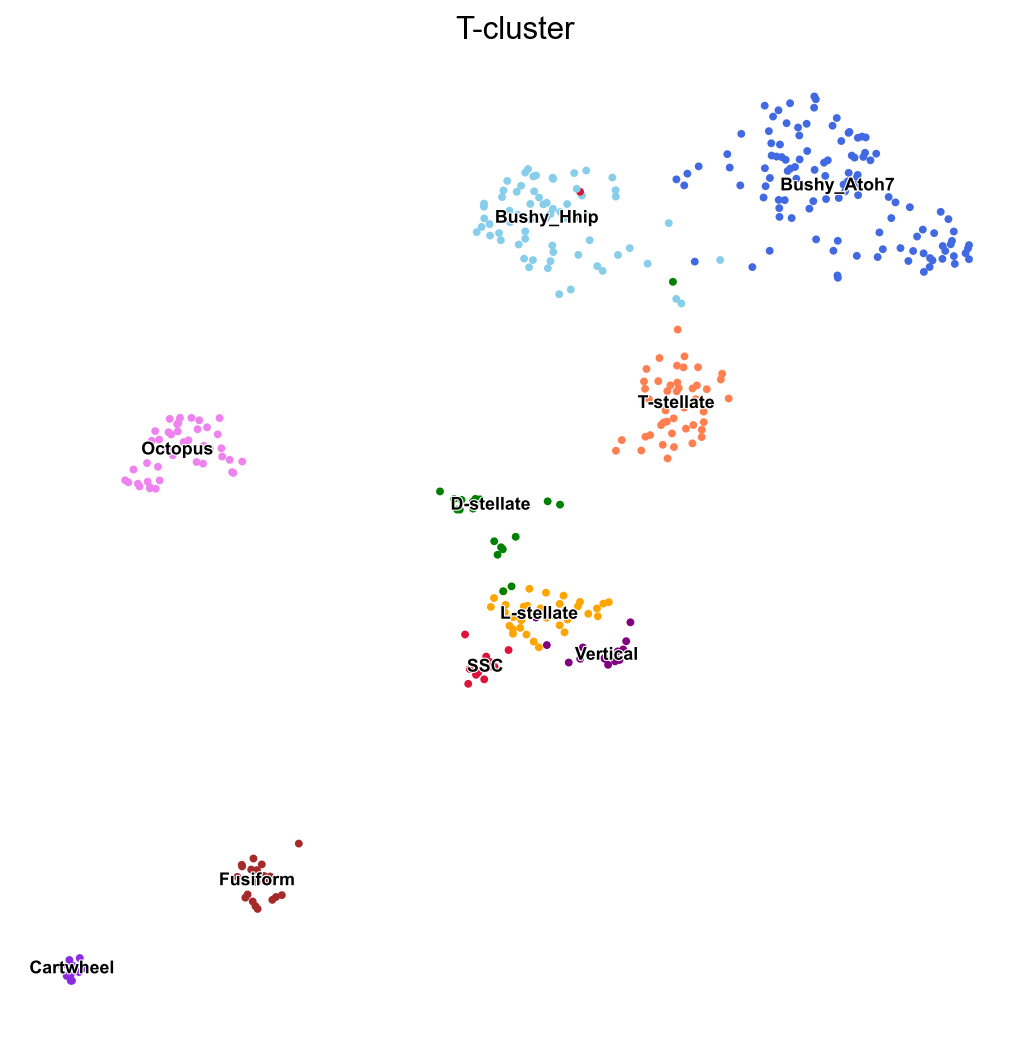

In [8]:
sc.pl.umap(patchseq_adata, color=['T-cluster'], 
           s = 50, legend_loc='on data', legend_fontsize=8, legend_fontoutline=1,
          frameon=False)